# Problem Statement

**Financial institutions** often **launch marketing campaigns** to promote term deposits. However, not all customers are equally likely 
to subscribe, leading to wasted resources when targeting uninterested clients. A predictive system is required to identify potential 
customers who are more likely to subscribe to a term deposit, thereby increasing campaign efficiency and reducing operational costs.

# About the Project

This project involves analyzing the **Bank Marketing Dataset** collected from direct marketing campaigns of a Portuguese 
banking institution. The data contains demographic, financial, and campaign-related attributes of clients. 
Using this dataset, we aim to build a predictive model that can classify whether a client will subscribe to a term deposit (y = yes/no).

The project combines **data preprocessing**, **exploratory data analysis (EDA)**, and **predictive modeling** to uncover hidden patterns
and improve decision-making for targeted marketing.

# Objective of the Project

**1.** To explore and understand client behavior and factors influencing their decision to subscribe to a term deposit.

**2.** To identify key attributes (age, job, balance, previous campaign outcome, etc.) that significantly impact subscription decisions.
    
**3.** To build a classification model (e.g., Logistic Regression, Decision Trees, Random Forest, etc.)
to predict the probability of a client subscribing.
                                        
**4.** To improve the efficiency of marketing campaigns by focusing on high-probability clients, reducing cost, and 
increasing success rates.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Meet and Greet data

Our first step is to create the get the csv and welcome it. Later we should dissect and perform descriptive analyis. 
Well that escalated quickly.

In [2]:
df=pd.read_csv('bank.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Dataset Features Description

The dataset has 4,521 **records** and 17 **attributes**:

**1.age (int64)** – Age of the client.

**2.job (object)** – Type of job (e.g., management, technician, blue-collar).

**3.marital (object)** – Marital status (married, single, divorced).

**4.education (object)** – Education level (primary, secondary, tertiary, unknown).

**5.default (object)** – Has credit in default? (yes/no).

**6.balance (int64)** – Average yearly balance in euros.

**7.housing (object)** – Has housing loan? (yes/no).

**8.loan (object)** – Has personal loan? (yes/no).

**9.contact (object)** – Contact communication type (cellular, telephone, unknown).

**10.day (int64)** – Last contact day of the month.

**11.month (object)** – Last contact month (jan, feb, …, dec).

**12.duration (int64)** – Duration of the last contact in seconds.

**13.campaign (int64)** – Number of contacts during the campaign.

**14.pdays (int64)** – Days passed after the client was last contacted (-1 means never contacted).

**15.previous (int64)** – Number of contacts before the current campaign.

**16.poutcome (object)** – Outcome of the previous marketing campaign (success, failure, other, unknown).

**17.y (object)** – Target variable: Has the client subscribed a term deposit? (yes/no).

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
categorical_col=df[['job','marital','education','default','housing',
       'loan','contact','month','poutcome','y']]

In [9]:
for col in categorical_col:
    print(df[col].value_counts(),sep='\n')
    print('-'*40)

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64
----------------------------------------
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
----------------------------------------
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64
----------------------------------------
default
no     4445
yes      76
Name: count, dtype: int64
----------------------------------------
housing
yes    2559
no     1962
Name: count, dtype: int64
----------------------------------------
loan
no     3830
yes     691
Name: count, dtype: int64
----------------------------------------
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64
--------------------

# Data Cleaning

###### first checking missing value in visually

<Axes: >

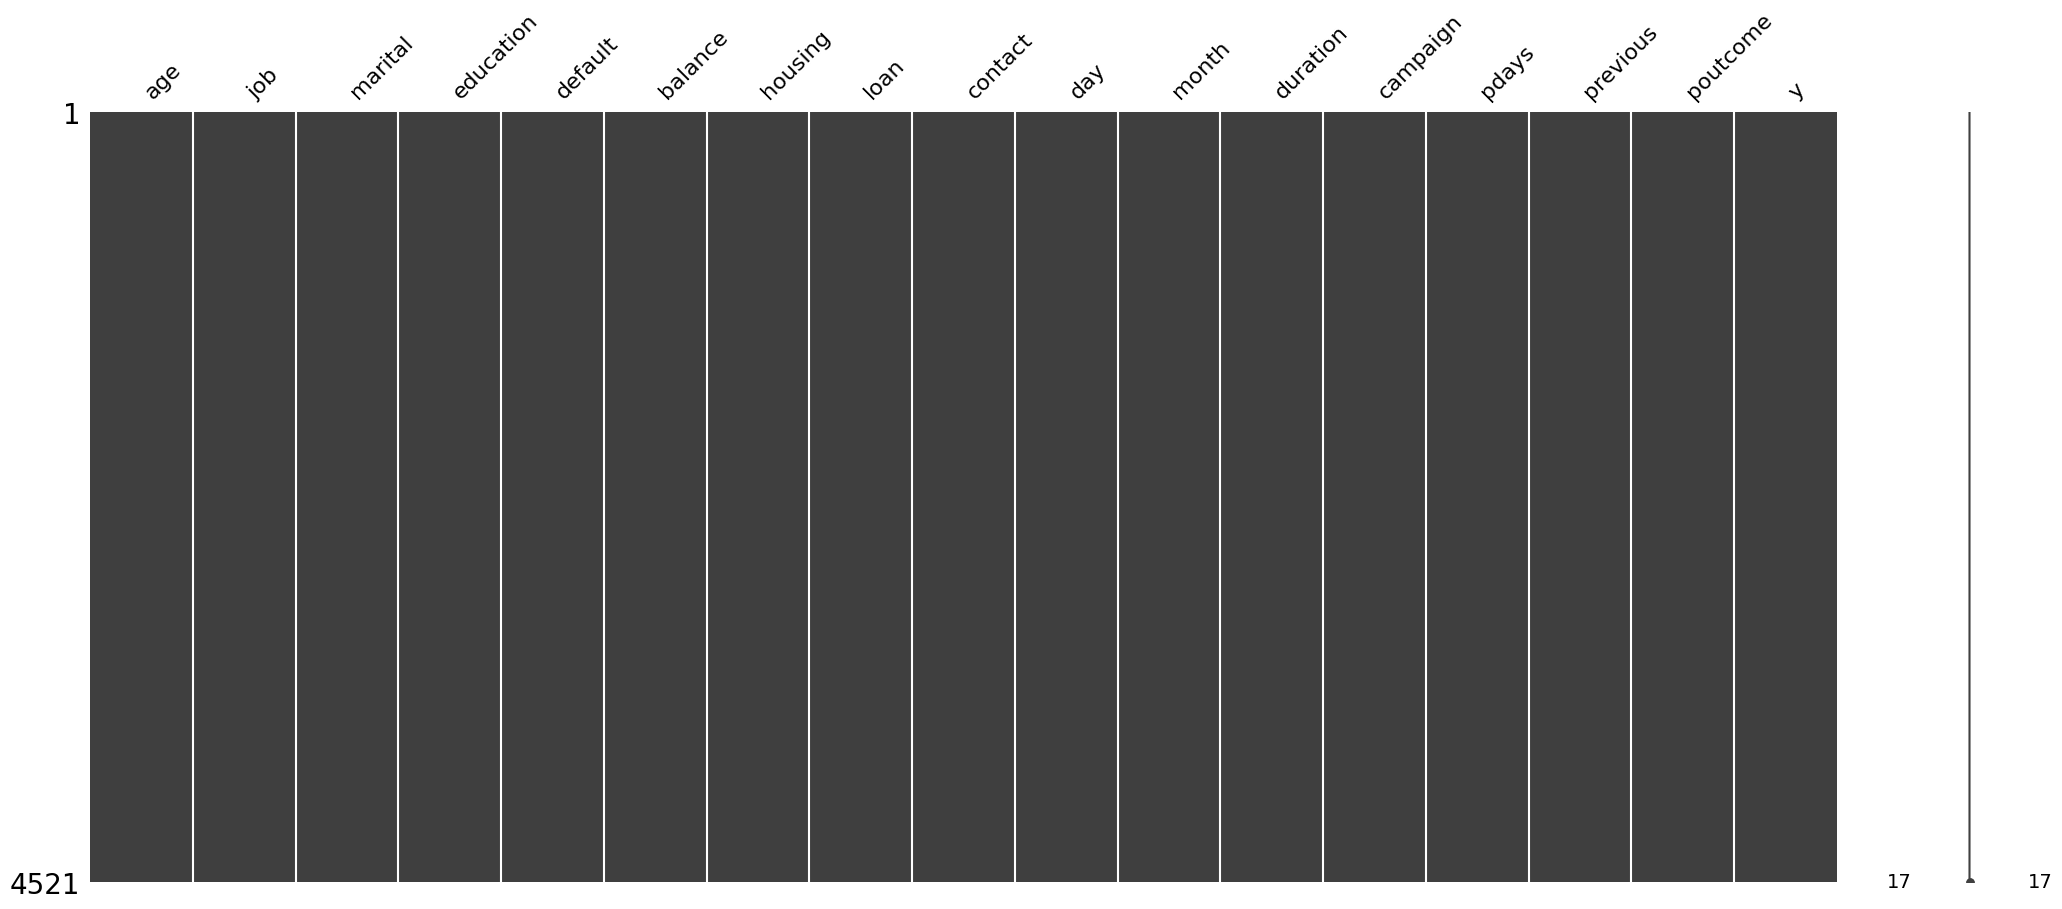

In [10]:
import missingno as msno
msno.matrix(df)

Looks like we don't have any null values except one. But plots sometimes deceive us, numbers don't. Let's check with the numbers

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No any nul value in bank datasets

## Data Visualization

In [12]:
sns.set(style="whitegrid")

C:\Users\Navneet\AppData\Local\Temp\ipykernel_11428\1698823661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='y',palette='viridis')


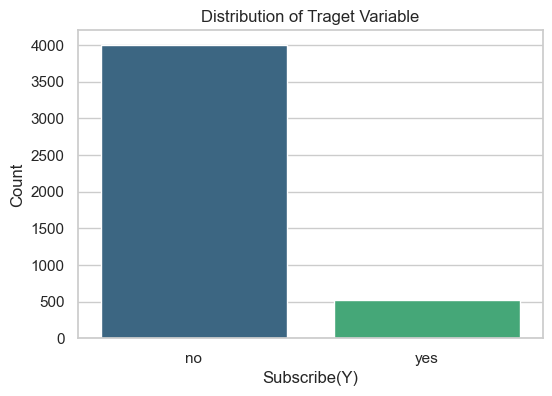

In [13]:
# Target variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='y',palette='viridis')
plt.title('Distribution of Traget Variable')
plt.xlabel('Subscribe(Y)')
plt.ylabel('Count')
plt.show()

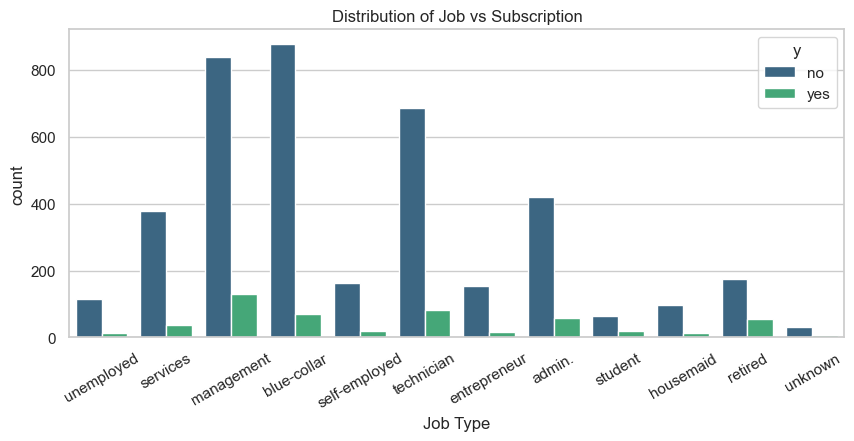

In [14]:
# Job vs Subscription
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='job',hue='y',palette='viridis')
plt.xticks(rotation=30)
plt.title('Distribution of Job vs Subscription')
plt.xlabel('Job Type')
plt.ylabel('count')
plt.show()

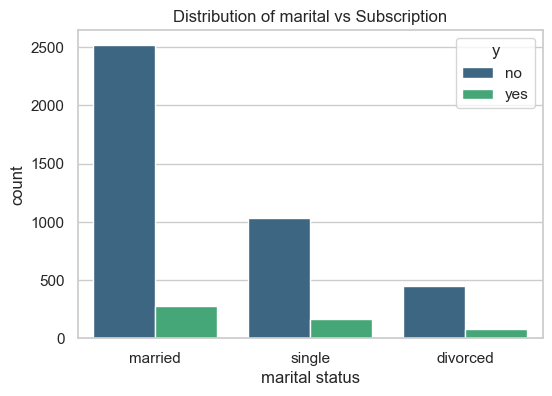

In [15]:


# marital  vs subscription
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='marital',hue='y',palette='viridis')
plt.title('Distribution of marital vs Subscription')
plt.xlabel('marital status')
plt.ylabel('count')
plt.show()

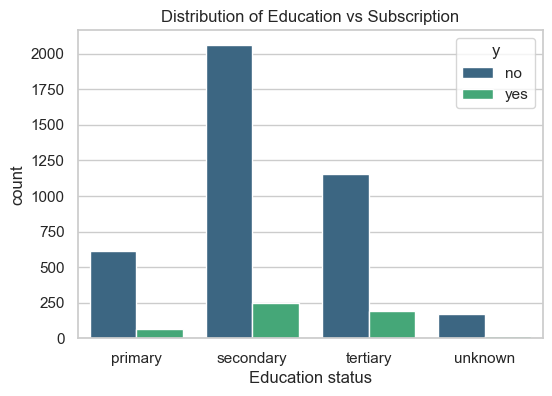

In [16]:
# Education vs Subscription
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='education',hue='y',palette='viridis')
plt.title('Distribution of Education vs Subscription')
plt.ylabel('count')
plt.xlabel('Education status')
plt.show()

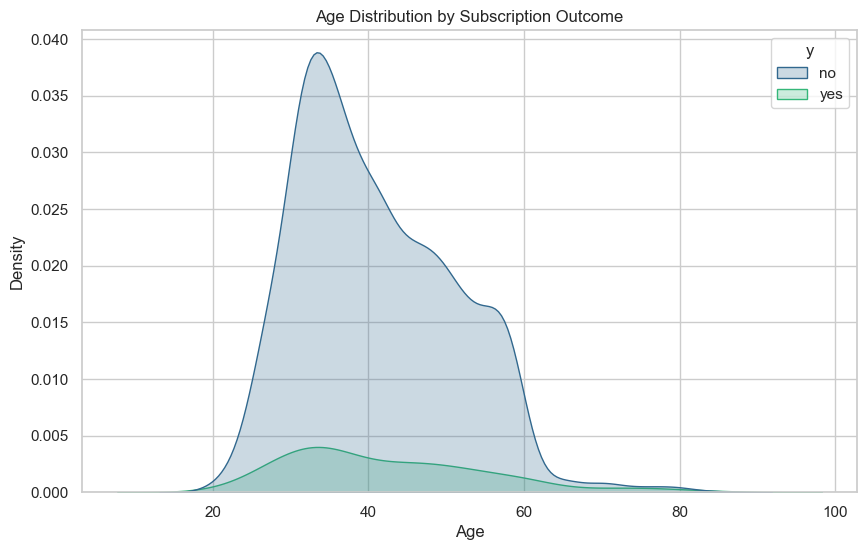

In [17]:
# Age vs Subscription
plt.figure(figsize=(10,6))
sns.kdeplot(data=df,x='age',hue='y',palette='viridis',fill=True)
plt.title("Age Distribution by Subscription Outcome")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

C:\Users\Navneet\AppData\Local\Temp\ipykernel_11428\2493164104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="y", y="balance", palette="viridis")


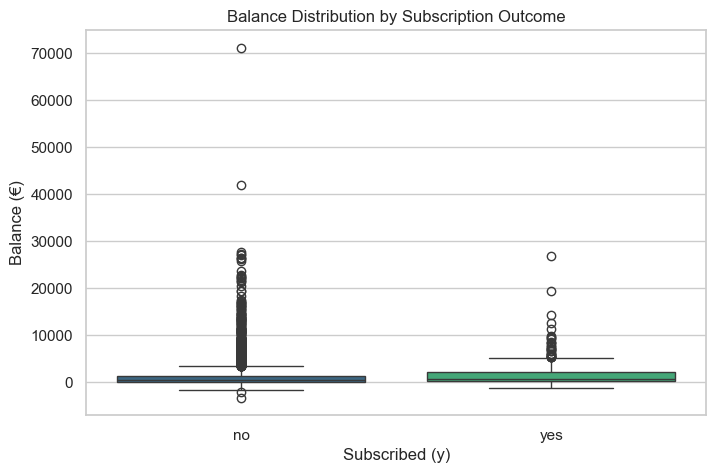

In [18]:


# Balance distribution (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="balance", palette="viridis")
plt.title("Balance Distribution by Subscription Outcome")
plt.xlabel("Subscribed (y)")
plt.ylabel("Balance (€)")
plt.show()

C:\Users\Navneet\AppData\Local\Temp\ipykernel_11428\2506843683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="y", y="duration", palette="viridis")


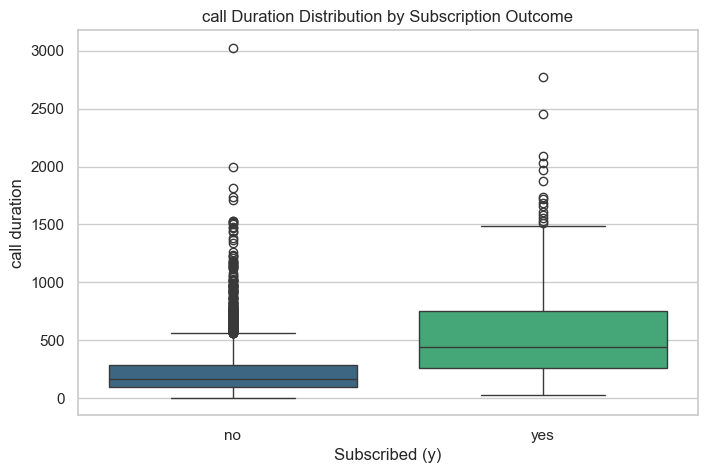

In [19]:
# Balance distribution (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="duration", palette="viridis")
plt.title("call Duration Distribution by Subscription Outcome")
plt.xlabel("Subscribed (y)")
plt.ylabel("call duration")
plt.show()

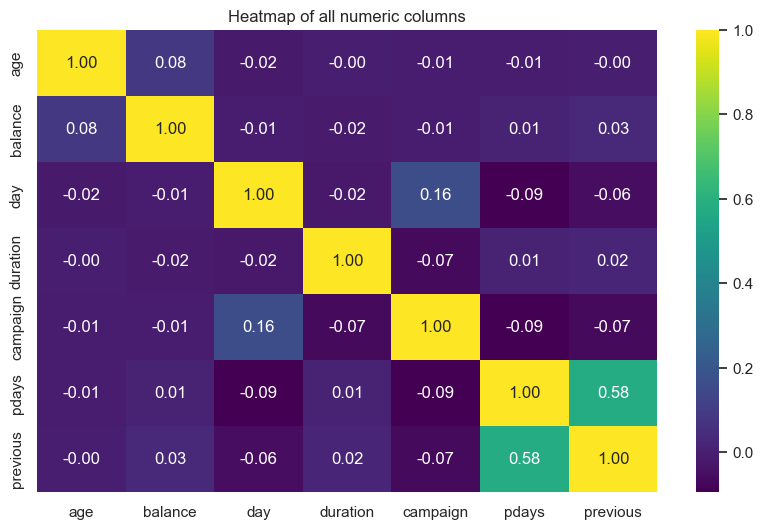

In [20]:
# plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='int64').corr(),annot=True,cmap='viridis',fmt='.2f')
plt.title('Heatmap of all numeric columns')
plt.show()

In [21]:
job_subscription = df.groupby("job")["y"].value_counts(normalize=True).unstack().fillna(0) * 100

In [22]:
job_subscription

y,no,yes
job,,
admin.,87.866109,12.133891
blue-collar,92.706131,7.293869
entrepreneur,91.071429,8.928571
housemaid,87.500000,12.500000
management,86.480908,13.519092
retired,76.521739,23.478261
self-employed,89.071038,10.928962
services,90.887290,9.112710
student,77.380952,22.619048


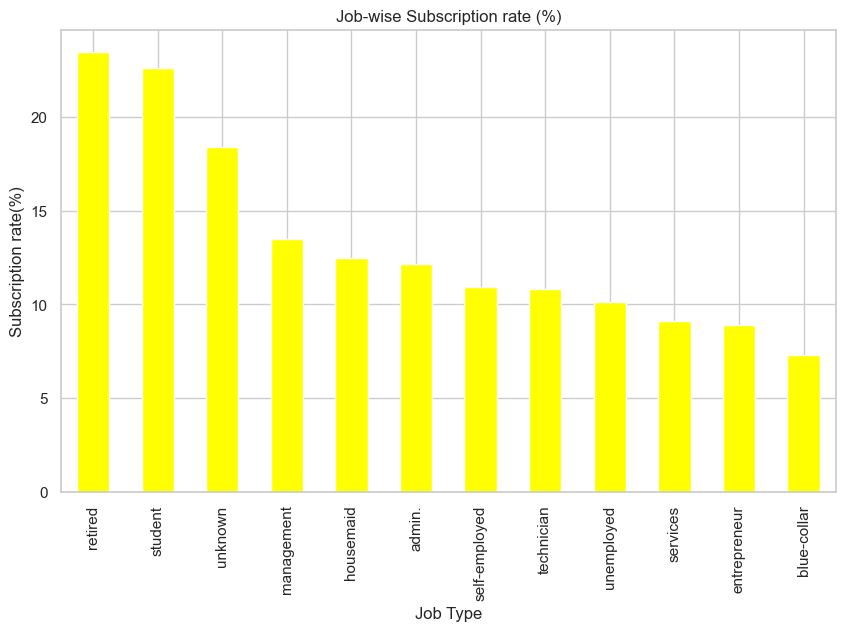

In [23]:
# Job-wise vs Subscription rate
plt.figure(figsize=(10,6))
job_subscription = df.groupby("job")["y"].value_counts(normalize=True).unstack().fillna(0) * 100
job_subscription['yes'].sort_values(ascending=False).plot(kind='bar',color='yellow')
plt.title('Job-wise Subscription rate (%)')
plt.xlabel('Job Type')
plt.ylabel('Subscription rate(%)')
plt.show()

Text(0.5, 1.0, 'Education-wise subscription rate(%)')

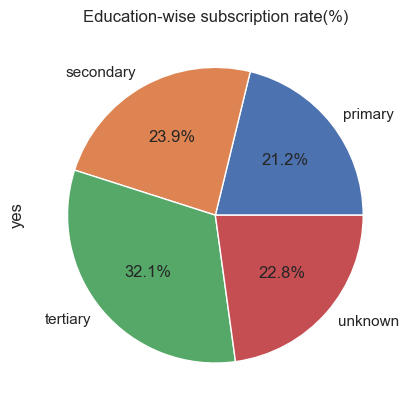

In [24]:
# Education-wise subscription rate
edu_subscription=df.groupby('education')['y'].value_counts(normalize=True).unstack().fillna(0)*100
edu_subscription['yes'].plot(kind='pie',autopct="%1.1f%%")
plt.title('Education-wise subscription rate(%)')

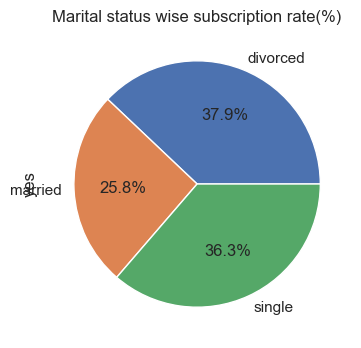

In [25]:
# marital status wise subscription rate
marital_subscription=df.groupby('marital')['y'].value_counts(normalize=True).unstack().fillna(0)*100
plt.figure(figsize=(12,4))
marital_subscription['yes'].plot(kind='pie',autopct="%1.1f%%")
plt.title('Marital status wise subscription rate(%)')
plt.show()

# Data Preprocessing

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Handle Outliers

###### balence and duration have extreme value

In [27]:
q1=df['balance'].quantile(0.25)
q3=df['balance'].quantile(0.75)
IQR=q3-q1

In [28]:
lower=(q1-1.5*IQR).item()
upper=(q3+1.5*IQR).item()
lower,upper

(-2047.5, 3596.5)

In [29]:
df=df[(df['balance'] >= lower) & (df['balance'] <=upper)]

In [30]:
q1=df['duration'].quantile(0.25)
q3=df['duration'].quantile(0.75)
IQR=q3-q1

In [31]:
lower=(q1-1.5*IQR).item()
upper=(q3+1.5*IQR).item()
lower,upper

(-236.0, 668.0)

In [32]:
df=df[(df['duration'] >= lower) & (df['duration'] <=upper)]

In [33]:
df.shape

(3722, 17)

In [34]:
# Encoding month 
month_num={'may':5,'jul':7,'aug':'8','jun':'6','nov':11,'apr':4,'feb':2,'jan':1,'oct':10,'sep':9,'mar':3,'dec':1}
df['month']=df['month'].map(month_num).astype(int)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,2,141,2,176,3,failure,no


In [35]:
# Encoding -1 in pdays feature( i.e clients who haven't been contacted for the previous campaign) into 0
df.loc[df['pdays']==-1,'pdays']=0

## ordinal number Encoding 

In [36]:
dic={'yes':1,'no':0}
df['default']=df['default'].map(dic).astype(int)
df['loan']=df['loan'].map(dic).astype(int)
df['housing']=df['housing'].map(dic).astype(int)

In [37]:
df['y']=df['y'].map(dic).astype(int)

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,0,0,unknown,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,4,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,6,199,4,0,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,5,226,1,0,0,unknown,0
5,35,management,single,tertiary,0,747,0,0,cellular,23,2,141,2,176,3,failure,0


In [39]:
# encoding the column cantact and poutcome
dummy_contact=pd.get_dummies(df['contact'],prefix='dummy',drop_first=True).astype(int)
dummy_poutcome=pd.get_dummies(df['poutcome'],prefix='dummy',drop_first=True).astype(int)
df.drop(['contact','poutcome'],axis=1,inplace=True)

In [40]:
df=pd.concat([df,dummy_contact,dummy_poutcome],axis=1)

#### Frequency Encoding

In [41]:
bank_job=df['job'].value_counts().to_dict()
bank_edu=df['education'].value_counts().to_dict()

#### frequency count of job and education in our dataset

#### lets map them

In [42]:
df['job']=df['job'].map(bank_job).astype(int)
df['education']=df['education'].map(bank_edu).astype(int)

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,dummy_telephone,dummy_unknown,dummy_other,dummy_success,dummy_unknown
0,30,109,married,554,0,1787,0,0,19,10,79,1,0,0,0,0,0,0,0,1
2,35,775,single,1086,0,1350,1,0,16,4,185,1,330,1,0,0,0,0,0,0
3,30,775,married,1086,0,1476,1,1,3,6,199,4,0,0,0,0,1,0,0,1
4,59,793,married,1935,0,0,1,0,5,5,226,1,0,0,0,0,1,0,0,1
5,35,775,single,1086,0,747,0,0,23,2,141,2,176,3,0,0,0,0,0,0


In [44]:
# encoding marital columns
dic1={
    'divorced':0,
    'single':1,
    'married':2
}
df['marital']=df['marital'].map(dic1).astype(int)

In [45]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,dummy_telephone,dummy_unknown,dummy_other,dummy_success,dummy_unknown
0,30,109,2,554,0,1787,0,0,19,10,79,1,0,0,0,0,0,0,0,1
2,35,775,1,1086,0,1350,1,0,16,4,185,1,330,1,0,0,0,0,0,0
3,30,775,2,1086,0,1476,1,1,3,6,199,4,0,0,0,0,1,0,0,1
4,59,793,2,1935,0,0,1,0,5,5,226,1,0,0,0,0,1,0,0,1
5,35,775,1,1086,0,747,0,0,23,2,141,2,176,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,351,1,1935,0,473,1,0,7,7,624,5,0,0,0,0,0,0,0,1
4516,33,351,2,1935,0,-333,1,0,30,7,329,5,0,0,0,0,0,0,0,1
4518,57,645,2,1935,0,295,0,0,19,8,151,11,0,0,0,0,0,0,0,1
4519,28,793,2,1935,0,1137,0,0,6,2,129,4,211,3,0,0,0,1,0,0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
df['day'].dtypes

dtype('int64')

In [48]:
num_col=['balance','duration','campaign','pdays','previous','day','age']

In [49]:
scale=StandardScaler()

In [50]:
for col in num_col:
    df[col]=scale.fit_transform(df[[col]])

In [51]:
df.shape

(3722, 20)

In [52]:
X=df.drop(['dummy_unknown','y'],axis=1)
y=df['y']

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
model=ExtraTreesClassifier()

In [56]:
model.fit(X_train,y_train)

ExtraTreesClassifier()

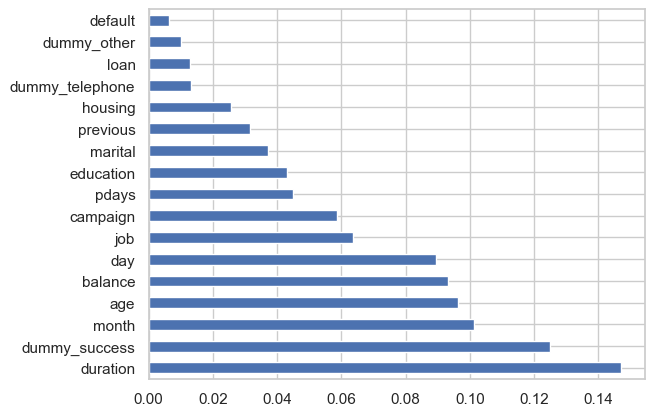

In [57]:
feature_importance=pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(19).plot(kind='barh')
plt.show()

##### From the bar plot we can see the importances of features based on it's impact towards output.

# Modelling the data

### Here import the classification machine learning algorithm because our dataset is binary class of target colum 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
lg=LogisticRegression(random_state=42)
nb=BernoulliNB()
svc=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
lgbc=LGBMClassifier()
knn=KNeighborsClassifier()

In [61]:
# 5:'XGBClassifier',6:'LGBMClassifier'
model_num={0:'Logistic Regression',1:'BernoulliNB',2:'SVC',3:'DecisionTreeClassifier',4:'RandomForestClassifier',
          5:'KNeighborsClassifier',6:'LGBMClassifier'}

In [62]:
model_name=[lg,nb,svc,dt,rf,knn,lgbc]

In [63]:
for i,clf in enumerate(model_name):
    print("{} Test Accuracy {}".format(model_num[i],cross_val_score(clf,X,y,cv=10,scoring='accuracy').mean()))

Logistic Regression Test Accuracy 0.9185952319178992
BernoulliNB Test Accuracy 0.9132275361065467
SVC Test Accuracy 0.9188618870535329
DecisionTreeClassifier Test Accuracy 0.8957580212747557
RandomForestClassifier Test Accuracy 0.9247722621003776
KNeighborsClassifier Test Accuracy 0.9193973593934676
[LightGBM] [Info] Number of positive: 271, number of negative: 3078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 3349, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080920 -> initscore=-2.429916
[LightGBM] [Info] Start training from score -2.429916
[LightGBM] [Info] Number of positive: 271, number of negative: 3078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of test

###### here all the model gives the test accuracy random forest follewed by lightboost .let's select a random forest 

## Fine Tuning Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid={
    'n_estimators': [50, 100, 200,500],
    'criterion':['gini','entropy'],
    'bootstrap': [True,False],
    'max_depth': [-1, 3, 5, 7,9]
}

In [70]:
clf = GridSearchCV(
    RandomForestClassifier(random_state=0),
    param_grid,
    cv=5,
    verbose=0,
    n_jobs=-1
)

In [71]:
best_model=clf.fit(X_train,y_train)

In [72]:
best_model.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=7, n_estimators=500,
                       random_state=0)

In [73]:
best_model.score(X_test,y_test)

0.9140939597315436

In [74]:
from sklearn.metrics import accuracy_score,classification_report

In [76]:
best_model=RandomForestClassifier(n_estimators=500,random_state=0,max_depth=7,bootstrap=False)

In [77]:
best_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=7, n_estimators=500,
                       random_state=0)

In [78]:
y_pred=best_model.predict(X_test)

In [79]:
accuracy_score(y_pred,y_test)

0.9140939597315436

In [80]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.95       729
           1       0.10      0.38      0.16        16

    accuracy                           0.91       745
   macro avg       0.54      0.65      0.56       745
weighted avg       0.97      0.91      0.94       745



In [96]:
# 📥 Take numeric inputs
age = int(input("Enter age: "))
duration = int(input("Enter call duration (in seconds): "))
campaign = int(input("Enter number of contacts during this campaign: "))
previous = int(input("Enter number of contacts performed before this campaign: "))
balance=int(input("Enter balance in eros : "))
day=int(input('Enter date : '))
pdays=int(input("Enter pdays : "))



# 📥 Take categorical inputs as integers
month=int(input("Enter month {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'}"))
default = int(input("Has credit in default? (1 for yes/0 for no): "))
housing = int(input("Has housing loan? (1 for yes/0 for no): "))
loan = int(input("Has personal loan? (1 for yes/0 for no): "))
dummy_other = int(input("Is previous campaign outcome 'nonexistent'? (1 for yes, 0 for no): "))
dummy_success = int(input("Is previous campaign outcome 'success'? (1 for yes, 0 for no): "))
dummy_telephone=int(input('Is contact by telephone ?(1 for yes,0 for no): '))
job=int(input("Enter your job frequency : "))
marital=int(input("Enter marital status {'divorced':0,'single':1,'married':2}: "))
education=int(input("Enter your education frequency : "))

Enter age:  20
Enter call duration (in seconds):  261
Enter number of contacts during this campaign:  1
Enter number of contacts performed before this campaign:  0
Enter balance in eros :  502
Enter date :  30
Enter pdays :  0
Enter month {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'} 4
Has credit in default? (1 for yes/0 for no):  0
Has housing loan? (1 for yes/0 for no):  0
Has personal loan? (1 for yes/0 for no):  0
Is previous campaign outcome 'nonexistent'? (1 for yes, 0 for no):  0
Is previous campaign outcome 'success'? (1 for yes, 0 for no):  1
Is contact by telephone ?(1 for yes,0 for no):  0
Enter your job frequency :  793
Enter marital status {'divorced':0,'single':1,'married':2}:  1
Enter your education frequency :  1935


In [81]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'dummy_telephone', 'dummy_other', 'dummy_success'],
      dtype='object')

In [97]:
# 📊 Create DataFrame for prediction
data = pd.DataFrame([{
    'age': age,"job":job,'marital': marital,'education':education,
    'default': default,'balance':balance, 'housing': housing, 'loan': loan,
    'day':day,'month':month,'duration': duration,'campaign': campaign,
    'pdays':pdays,'previous': previous,'dummy_telephone':dummy_telephone,
    'dummy_other': dummy_other, 'dummy_success': dummy_success,  
}])

In [98]:
# 📈 Make prediction
prediction = model.predict(data)
prediction

array([1])

In [99]:
# 📣 Show result
if prediction[0] == 0:
    print("This Customer is not be recomended🚫")
else:
    print("This Customer is recomended ✅")

This Customer is recomended ✅


In [92]:
#-2.012722	71	1	1935	0	-0.161714	0	0	1.699607	4	0.358562	-0.567922	-0.403916	-0.311793	1	0	0	0	0	1